# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [168]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats

In [169]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [170]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

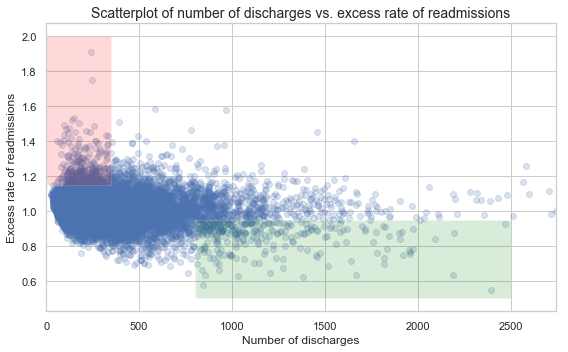

In [171]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

Although plots are a great visual tool for data analysis, it is better used as a supplement for data story telling. The overall analysis of the data lacks statistical analysis and conclusions made strictly from the plot could be incomplete or misinterpreted. <p>
The conclusion that there is a significant correlation between hospital capacity (number of discharges) and readmission rates cannot be confirmed without rejection or acceptance of a null and alternative hypothesis.</p><p>
Therefore, I cannot agree with the above analysis and recommendations without exploring the data more thoroughly. </p>

<b>Setup an appropriate hypothesis test.</b><p>
    Ho: There is no significant correlation between hospital capacity(number of discharges) and readmission rates for different states. </p><p>
    Ha: There is significant correlation between hospital capacity and readmission rates for different states. 

In [172]:
# Making a new dataframe with state and excess readmissions variables
#Combines all facilities into their respective states

x = list(clean_hospital_read_df['State'][81:-3])
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

x = pd.DataFrame(x)
y = pd.DataFrame(y)

new = pd.concat([x,y], axis=1)
new.columns = ['state', 'excess_readmissions']
new = new.groupby('state').mean().reset_index()
print(new)

   state  excess_readmissions
0     AK             0.979645
1     AL             1.019177
2     AR             1.030027
3     AZ             0.998832
4     CA             0.996700
5     CO             0.952012
6     CT             1.024070
7     DC             1.087121
8     DE             0.966656
9     FL             1.011553
10    GA             1.002620
11    HI             0.978673
12    IA             0.961252
13    ID             0.918378
14    IL             1.032541
15    IN             0.984684
16    KS             0.965598
17    KY             1.047303
18    LA             1.013417
19    MA             1.032515
20    MD             1.044616
21    ME             0.964586
22    MI             1.000973
23    MN             0.982573
24    MO             1.014379
25    MS             1.035430
26    MT             0.910461
27    NC             0.996284
28    ND             0.919466
29    NE             0.931769
30    NH             0.954329
31    NJ             1.053389
32    NM  

In [173]:
#Recreate table showing excess readmission ratio from lowest to highest and reset indices.
new = new.sort_values(by='excess_readmissions')
new = new.reset_index(drop=True)
print(new)

   state  excess_readmissions
0     SD             0.909824
1     MT             0.910461
2     ID             0.918378
3     ND             0.919466
4     NE             0.931769
5     OR             0.943070
6     VT             0.947548
7     UT             0.951774
8     CO             0.952012
9     NH             0.954329
10    IA             0.961252
11    WI             0.963737
12    ME             0.964586
13    KS             0.965598
14    DE             0.966656
15    NM             0.970825
16    WA             0.976310
17    HI             0.978673
18    AK             0.979645
19    MN             0.982573
20    IN             0.984684
21    WY             0.990235
22    TX             0.991294
23    NC             0.996284
24    CA             0.996700
25    AZ             0.998832
26    MI             1.000973
27    GA             1.002620
28    SC             1.003769
29    OK             1.008417
30    FL             1.011553
31    PA             1.011803
32    RI  

To test for significant difference, I am going to test SD (South Dakota), ME (Maine), AZ (Arizona), CT (Connecticut) and DC (District of Columbia). I picked these 5 to compare the states with increasing excess admission rate ratios. 

In [215]:
## Going back to original dataframe

x = list(clean_hospital_read_df['State'][81:-3])
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

x = pd.DataFrame(x)
y = pd.DataFrame(y)

new = pd.concat([x,y], axis=1)
new.columns = ['state', 'excess_readmissions']

In [175]:
# Data for SD (South Dakota)

sd = new[new.state == 'SD']
sd = sd['excess_readmissions']

In [176]:
# Data for ME (Maine)

me = new[new.state == 'ME']
me = me['excess_readmissions']

In [177]:
# Data for AZ (Arizona)

az = new[new.state == 'AZ']
az = az['excess_readmissions']

In [178]:
# Data for CT (Connecticut)

ct = new[new.state == 'CT']
ct = ct['excess_readmissions']

In [179]:
# Data for DC (District of Columbia)

dc = new[new.state == 'DC']
dc = dc['excess_readmissions']

In [180]:
#calculate t-value between states
scipy.stats.ttest_ind(sd, me)

Ttest_indResult(statistic=-3.316345568430239, pvalue=0.0012395588128031407)

In [181]:
scipy.stats.ttest_ind(sd, az)

Ttest_indResult(statistic=-5.64288882086904, pvalue=4.605784078533676e-08)

In [182]:
scipy.stats.ttest_ind(sd, ct)

Ttest_indResult(statistic=-7.555200306351091, pvalue=2.7261864116376554e-12)

In [183]:
scipy.stats.ttest_ind(sd, dc)

Ttest_indResult(statistic=-6.18483989150446, pvalue=4.0301006708812007e-08)

In [184]:
scipy.stats.ttest_ind(me, az)

Ttest_indResult(statistic=-2.8593921785064915, pvalue=0.004570863285446845)

In [185]:
scipy.stats.ttest_ind(me, ct)

Ttest_indResult(statistic=-5.214099577733501, pvalue=4.712017391785324e-07)

In [186]:
scipy.stats.ttest_ind(me, dc)

Ttest_indResult(statistic=-5.702872623623857, pvalue=1.2732750179063104e-07)

In [187]:
scipy.stats.ttest_ind(az, ct)

Ttest_indResult(statistic=-2.5887359002356325, pvalue=0.010059177799555032)

In [188]:
scipy.stats.ttest_ind(az, dc)

Ttest_indResult(statistic=-4.545938407641726, pvalue=8.790282704803674e-06)

<b>2. Compute and report the observed significance value (or p-value).</b> <p>
All p-values are less than or equal to 0.01, so we can reject the null hypothesis and accept the alternative hypothesis that states there is a significant correlation between hospital capacity and excess readmission rates. </p><p>
    <b>3. Report statistical significance for  𝛼  = .01.</b></p><p>
    All values are statistically significant because they are less than or equal to 𝛼.</p>

<b>4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?</b><p>
    Statistical significance is the likelihood that a relationship between two or more variables is caused by something other than chance. Practical significance refers to the magnitude of the relationship. Statistical significance and practical significance differ in this scenario because although there is a statistically significant difference between discharge numbers and excess readmission rates (as shown by p-values calculated between states), the practical application of this knowledge depends on the hospital's ability to implement any changes. 
    

<b>5. Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.</b><p>
    Advantages: It has clear axes labels to show what two parameters are being compared.</p><p>
    Disadvantages: This plot combines all of the data across the country, so it is difficult to conclude whether small hospitals are affected in the same way as big hospitals. 

The following violin plot shows the probability density of South Dakota of excess readmission. The scatter plot is specifically for South Dakota and shows the relation between discharge rates and excess readmission by a trendline. Both can be recreated for every state or region. The negative trendline suggests rate of readmissions is trending down with increasing number of discharges. 

Text(0, 0.5, 'Excess Readmission Ratio')

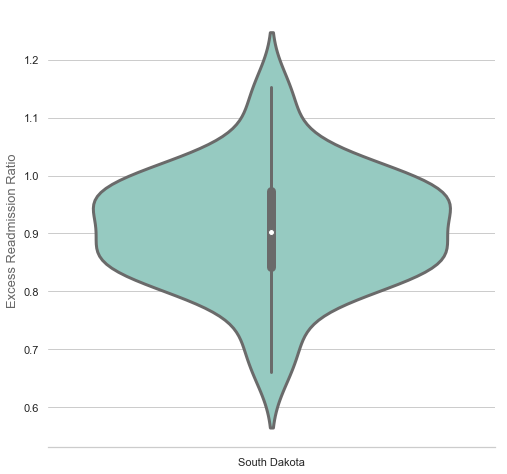

In [208]:
sd = new[new.state == 'SD']
sd = sd[['excess_readmissions']]
sd.columns = ['South Dakota']

f, ax = plt.subplots(figsize=(8, 8))

sns.violinplot(data=sd, inner="box", palette="Set3", cut=2, linewidth=3)

sns.despine(left=True)

ax.set_ylabel("Excess Readmission Ratio",size = 13,alpha=0.7)

In [238]:
#Go back to original dataframe and add new discharge numbers column
x = list(clean_hospital_read_df['State'][81:-3])
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])
z = list(clean_hospital_read_df['Number of Discharges'][81:-3])

x = pd.DataFrame(x)
y = pd.DataFrame(y)
z = pd.DataFrame(z)

new = pd.concat([x,y,z], axis=1)
new.columns = ['state', 'excess_readmissions', 'discharge_num']

In [239]:
sd = new[new.state == 'SD']
er = sd['excess_readmissions'] #excess readmission ratio for South Dakota
nod = sd['discharge_num'] #number of discharges for South Dakota


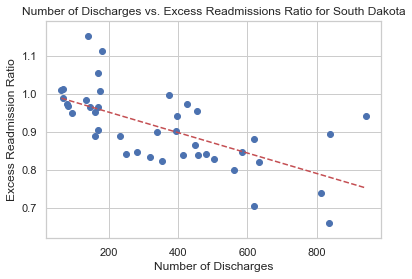

In [240]:
plt.scatter(nod, er)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
z = np.polyfit(nod, er, 1)
p = np.poly1d(z)
plt.plot(nod,p(nod),"r--")
plt.title('Number of Discharges vs. Excess Readmissions Ratio for South Dakota')
plt.show()